<a href="https://colab.research.google.com/github/eminshall/Notebooks-Youtube-Channel/blob/main/Portfolio_of_ETF's_vs_S%26P_Information_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import yfinance as yf
from datetime import datetime, date
import datetime

In [ ]:
ETFs = ['XLC','VCR','VDC','XLE','RSPF','XHE','VIS','IFRA','DRIV','VAW','XLRE','XLK','VPU']
index = 'SPY'

end = date.today()
start = end - datetime.timedelta(days = 3*365)

def get_returns(portfolio, start, end):

  data = yf.download(portfolio, start, end)['Close']

  portfolio_returns = (data
                       .pct_change()
                       .dropna()
                       .sum(axis=1))

  return portfolio_returns

etf_returns = get_returns(ETFs, start, end)
index_returns = get_returns(index, start, end)

etf_returns.name = 'ETFs'
index_returns.name = 'S&P 500'

[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  1 of 1 completed


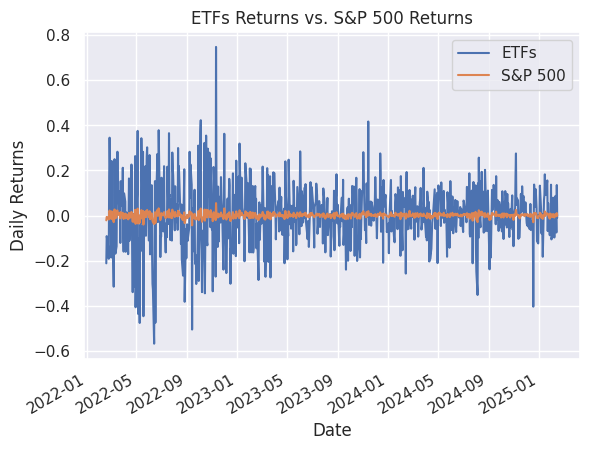

In [ ]:
etf_returns.plot()
index_returns.plot()
plt.ylabel('Daily Returns')
plt.title('ETFs Returns vs. S&P 500 Returns')
plt.legend()

In [ ]:
def information_ratio(portfolio_returns, bench_returns):
  active_return = portfolio_returns - bench_returns
  tracking_error = active_return.std()
  return active_return.mean() / tracking_error

In [ ]:
etf_ir = information_ratio(etf_returns, index_returns)

print(f'ETF Information Ratio: {etf_ir}')

ETF Information Ratio: 0.03260945843460274


In [ ]:
import vectorbt as vbt

data = yf.download(ETFs, start, end)['Close']
pf = vbt.Portfolio.from_holding(data, freq='1d')

[*********************100%***********************]  13 of 13 completed


<Axes: xlabel='Ticker'>

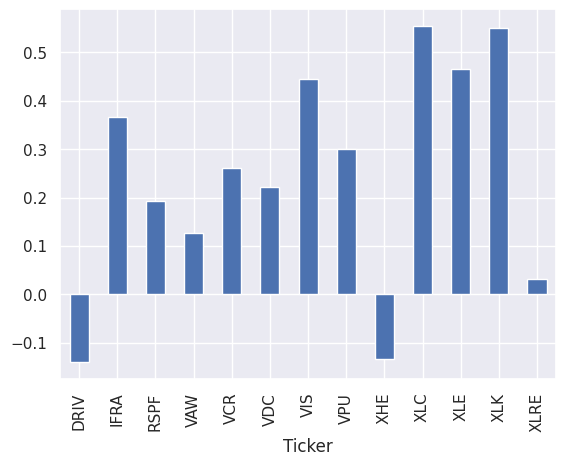

In [ ]:
pf.total_return().groupby("Ticker").mean().plot(kind='bar')

In [ ]:
pf.sharpe_ratio()

,sharpe_ratio
Ticker,
DRIV,-0.057183
IFRA,0.788819
RSPF,0.474749
VAW,0.361571
VCR,0.526424
VDC,0.688992
VIS,0.933158
VPU,0.693008
XHE,-0.078744


#Consider Supporting Me

Making theses videos takes time and effort. Contributions from viewers like you help support my channel and avoid the need for promoting a Patreon, sponsors, or selling a course. Click the link and choose any amount you'd like. Thank you.

https://ko-fi.com/minshallsfi